# Importing Libraries and dataset

In [46]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score,roc_auc_score,precision_score,recall_score,f1_score,confusion_matrix,plot_confusion_matrix
import joblib  

In [53]:
import lightgbm 
print(lightgbm.__version__)

3.3.2


In [6]:
dataset=pd.read_csv(r'heart_2020_cleaned.csv')
data=dataset.copy()

In [7]:
pd.set_option('max_column', None)

# Data Exploration

In [8]:
data.head(20)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
6,No,21.63,No,No,No,15.0,0.0,No,Female,70-74,White,No,Yes,Fair,4.0,Yes,No,Yes
7,No,31.64,Yes,No,No,5.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,9.0,Yes,No,No
8,No,26.45,No,No,No,0.0,0.0,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5.0,No,Yes,No
9,No,40.69,No,No,No,0.0,0.0,Yes,Male,65-69,White,No,Yes,Good,10.0,No,No,No


In [9]:
data.tail(20)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
319775,No,24.37,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,No,Good,8.0,No,No,No
319776,No,27.98,No,No,No,0.0,0.0,No,Female,50-54,Hispanic,No,No,Good,8.0,No,No,No
319777,No,42.57,No,No,No,0.0,0.0,Yes,Female,60-64,Hispanic,No,No,Good,7.0,No,No,No
319778,No,26.63,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Very good,8.0,No,No,No
319779,No,23.38,Yes,No,No,30.0,0.0,Yes,Female,70-74,Hispanic,No,Yes,Fair,5.0,No,No,No
319780,No,30.67,No,No,No,0.0,8.0,No,Female,25-29,Hispanic,No,Yes,Very good,7.0,No,No,No
319781,Yes,37.12,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,7.0,No,No,No
319782,No,31.89,Yes,No,No,30.0,30.0,Yes,Female,55-59,Hispanic,No,No,Fair,4.0,No,No,No
319783,No,33.28,No,No,No,0.0,0.0,No,Female,30-34,Hispanic,No,Yes,Excellent,8.0,No,No,No
319784,No,26.58,Yes,No,No,0.0,0.0,Yes,Male,75-79,Hispanic,No,Yes,Good,6.0,No,No,No


In [10]:
data.shape

(319795, 18)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [12]:
data.nunique()

HeartDisease           2
BMI                 3604
Smoking                2
AlcoholDrinking        2
Stroke                 2
PhysicalHealth        31
MentalHealth          31
DiffWalking            2
Sex                    2
AgeCategory           13
Race                   6
Diabetic               4
PhysicalActivity       2
GenHealth              5
SleepTime             24
Asthma                 2
KidneyDisease          2
SkinCancer             2
dtype: int64

In [13]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
BMI,319795.0,28.325399,6.356100,12.02,24.03,27.34,31.42,94.85
PhysicalHealth,319795.0,3.371710,7.950850,0.00,0.00,0.00,2.00,30.00
MentalHealth,319795.0,3.898366,7.955235,0.00,0.00,0.00,3.00,30.00
SleepTime,319795.0,7.097075,1.436007,1.00,6.00,7.00,8.00,24.00


## Data Description 
       
1. HeartDisease :Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI)
      
2. BMI: Body Mass Index (BMI)
3. Smoking: Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes]
4. AlcoholDrinking: Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week
5. Stroke: (Ever told) (you had) a stroke?
6. PhysicalHealth: Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30
7. MentalHealth: Thinking about your mental health, for how many days during the past 30 days was your mental health not good?
8. DiffWalking: Do you have serious difficulty walking or climbing stairs?
9. Sex: Are you male or female?
10.AgeCategory: Fourteen-level age category
11.Race: Imputed race/ethnicity value
12.Diabetic: (Ever told) (you had) diabetes?
13.PhysicalActivity: Adults who reported doing physical activity or exercise during the past 30 days other than their regular job
14.GenHealth: Would you say that in general your health is..
15.SleepTime: On average, how many hours of sleep do you get in a 24-hour period?
16.Asthma:(Ever told) (you had) asthma?
17.KidneyDisease: Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?
18.SkinCancer : (Ever told) (you had) skin cancer?

# Data Visualization 

<AxesSubplot:ylabel='HeartDisease'>

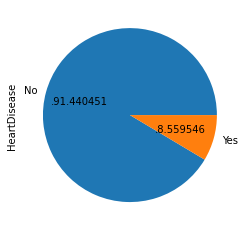

In [14]:
data.HeartDisease.value_counts().plot.pie(autopct='.%2f')

<AxesSubplot:xlabel='count', ylabel='HeartDisease'>

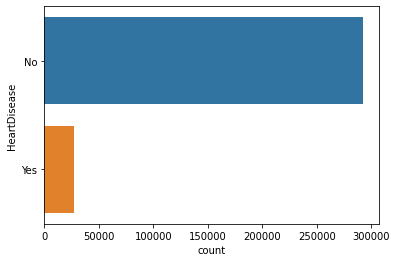

In [15]:
sns.countplot(y=data.HeartDisease)

In [16]:
low_cardinality_cols=[col for col in data.columns if data[col].nunique()<=31]
len(low_cardinality_cols)


17

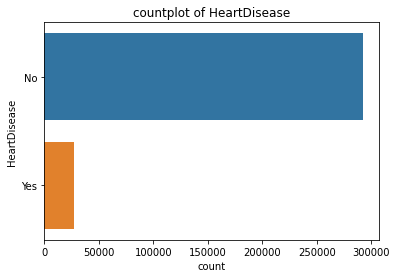

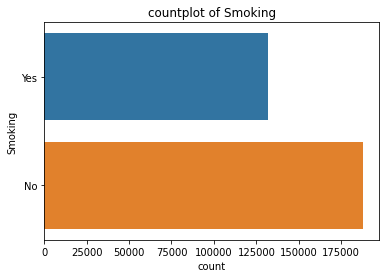

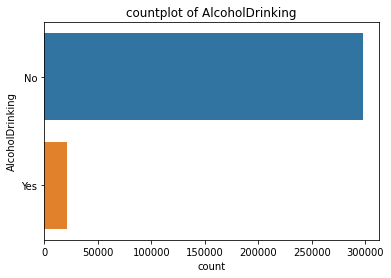

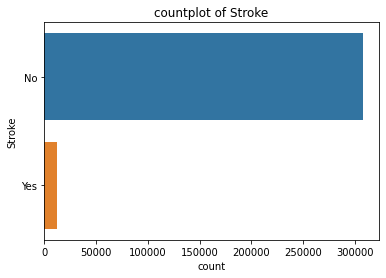

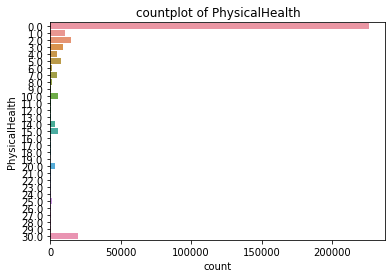

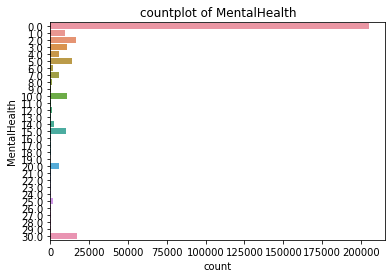

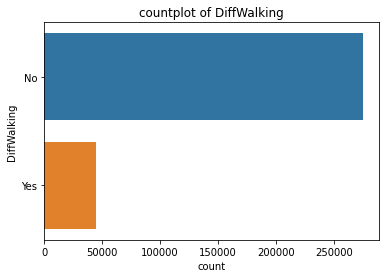

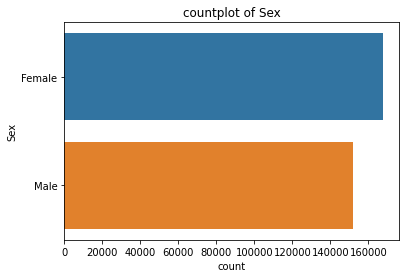

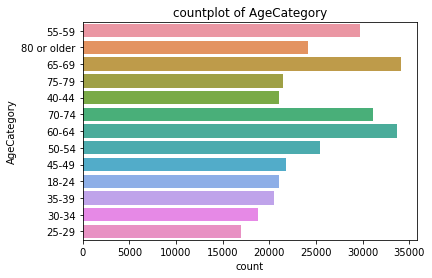

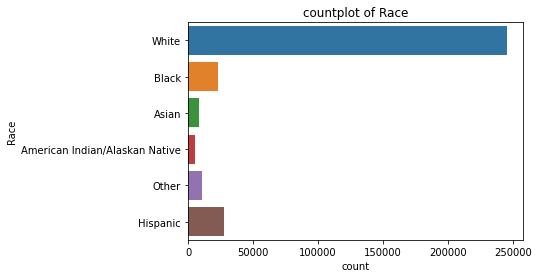

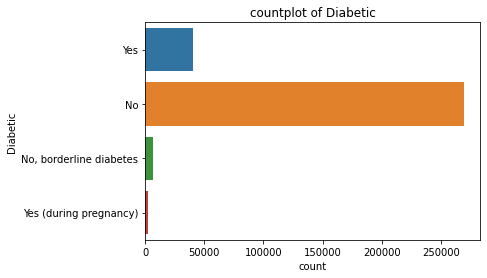

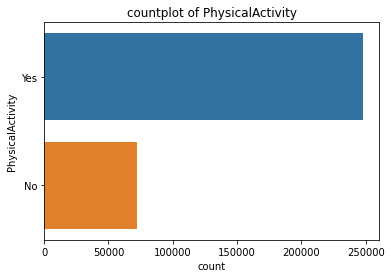

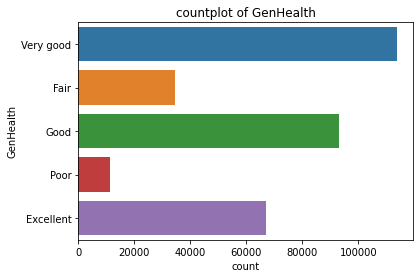

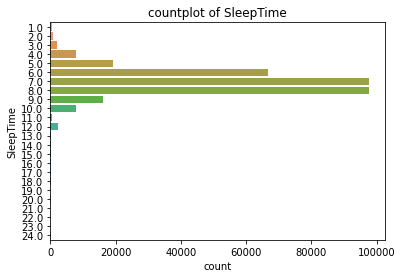

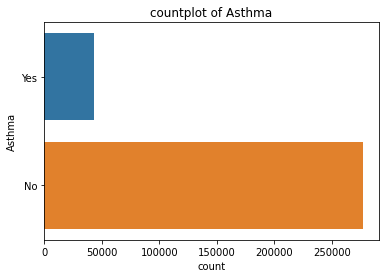

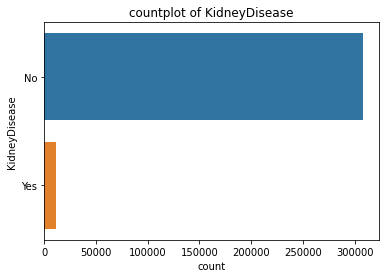

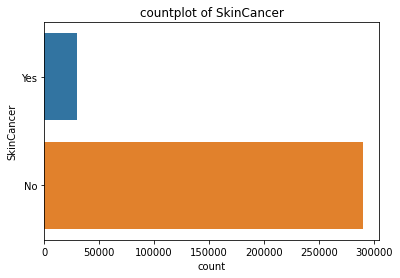

In [17]:
for col in low_cardinality_cols:
    plt.title(f'countplot of {col}')
    sns.countplot(y=data[col])
    plt.show()

<AxesSubplot:xlabel='BMI', ylabel='Count'>

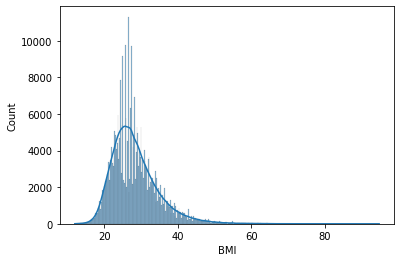

In [18]:
sns.histplot(x=data.BMI,kde=True)

# Feature Selection

In [19]:
data.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [20]:
cols_to_drop=['MentalHealth','Race','SkinCancer','KidneyDisease']

In [21]:
data=data.drop(cols_to_drop,axis=1)

# Balancing dataset with Under Sampling

In [22]:
X=data.drop('HeartDisease',axis=1)
Y=data.HeartDisease

In [23]:
Y.value_counts()

No     292422
Yes     27373
Name: HeartDisease, dtype: int64

In [24]:

ros=RandomUnderSampler(sampling_strategy='not minority')

ros_X,ros_Y=ros.fit_resample(X,Y)


In [25]:
print(ros_X.shape)
ros_Y.shape

(54746, 13)


(54746,)

In [26]:
ros_Y.value_counts()

No     27373
Yes    27373
Name: HeartDisease, dtype: int64

In [27]:
ros_X.BMI.isna().sum()

0

# train test split and preprocessing pipeline

In [28]:
train_X,test_X,train_y,test_y=train_test_split(ros_X,ros_Y,test_size=0.20,random_state=0)

In [29]:
train_y=train_y.replace({'Yes':1, 'No':0})
test_y=test_y.replace({'Yes':1, 'No':0})

In [30]:
cat_cols=[col for col in train_X.columns if train_X[col].dtypes=='object']
num_cols=[col for col in train_X.columns if train_X[col].dtypes!='object']

print(f'numerical columns: {num_cols}')
print(f'categorical columns: {cat_cols}')

numerical columns: ['BMI', 'PhysicalHealth', 'SleepTime']
categorical columns: ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'AgeCategory', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma']


In [31]:
num_preprocess=Pipeline(steps=[
    ('scale',StandardScaler())
])

obj_preprocess=Pipeline(steps=[
    ('encode',OneHotEncoder(handle_unknown='ignore'))
])

preprocesser=ColumnTransformer(transformers=[
    ('num',num_preprocess,num_cols),
    ('obj',obj_preprocess,cat_cols)
])

# Model building and Evaluation with Light GBM Classifier 

In [32]:
lgb_model=LGBMClassifier(n_estimators=200,random_state=0,max_depth=30,num_leaves=80,
                        learning_rate=0.10,min_child_samples=5,boosting_type='dart')

In [33]:
lgb_pipe=Pipeline(steps=[
    ('preprocess',preprocesser),
    ('model',lgb_model)
])


In [34]:
lgb_pipe.fit(train_X,train_y)

lgb_pred=lgb_pipe.predict(test_X)

In [35]:
print(f'Accuracy Score of LightGBM Model: {accuracy_score(lgb_pred,test_y)}')

print(f'ROC AUC Score of LightGBM Model: {roc_auc_score(lgb_pred,test_y)}')

print(f'F1 Score of LightGBM Model: {f1_score(lgb_pred,test_y)}')

print(f'Precision Score of LightGBM Model: {precision_score(lgb_pred,test_y)}')

print(f'Recall Score of LightGBM Model: {recall_score(lgb_pred,test_y)}')

print('Confusion Matric for LightGBM Model')
confusion_matrix(lgb_pred,test_y) 

Accuracy Score of LightGBM Model: 0.7642009132420091
ROC AUC Score of LightGBM Model: 0.7666542577952642
F1 Score of LightGBM Model: 0.7762952694507018
Precision Score of LightGBM Model: 0.8132147395171537
Recall Score of LightGBM Model: 0.7425824631195094
Confusion Matric for LightGBM Model


array([[3888, 1029],
       [1553, 4480]], dtype=int64)

C:\Users\parth\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


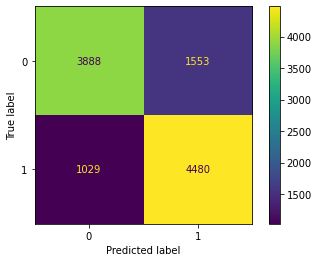

In [36]:
plot_confusion_matrix(lgb_pipe,test_X,test_y)

<AxesSubplot:title={'center':'Countplot of Actual values'}, xlabel='count', ylabel='HeartDisease'>

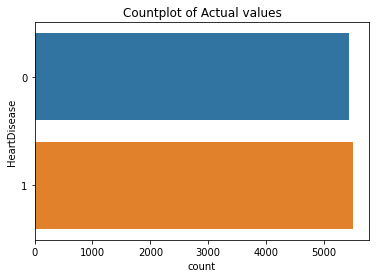

In [37]:
plt.title('Countplot of Actual values')
sns.countplot(y=test_y)

<AxesSubplot:title={'center':'Countplot of Predicted values'}, xlabel='count'>

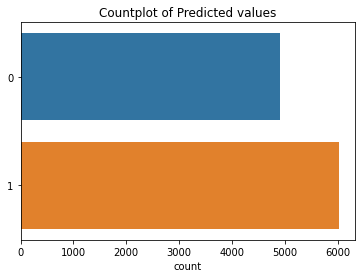

In [38]:
plt.title('Countplot of Predicted values')
sns.countplot(y=lgb_pred)

In [39]:
joblib.dump(lgb_pipe,'lgb_model.pkl')

['lgb_model.pkl']